# Goal

In this and the following tutorial, the goal is to learn several arithmetic operations on images, like addition, subtraction, bitwise operations, and etc.
Learn these functions: cv.add(), cv.addWeighted(), etc.


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img1 = cv2.imread('../images/berlin.jpg')
img2 = cv2.imread('../images/dog.jpg')

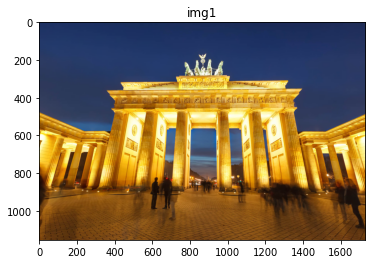

In [3]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('img1')
plt.show()

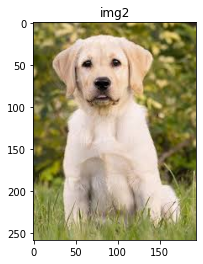

In [4]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('img2')
plt.show()

### Important note
Size of the images are important. 
We will use the bigger image(img1) as base

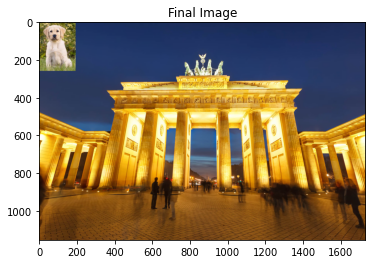

In [5]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Final Image')
plt.show()

# Overlaying
If the shape of the image are same, then both of the images can be overlay.

In [6]:
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-b4ibzwe2/opencv/modules/core/src/arithm.cpp:669: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'
